#### <i> Mean-Shift Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

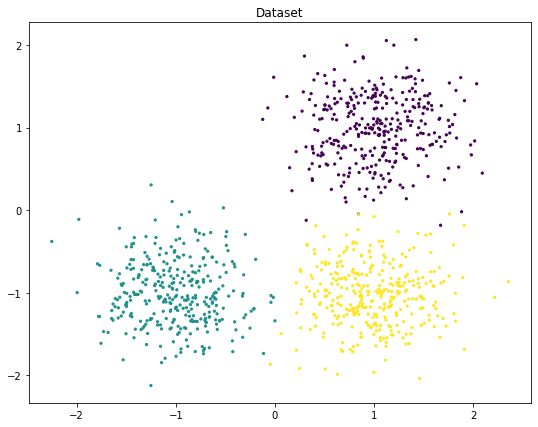

In [2]:
centers = [[1,1],[-1,-1],[1,-1]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4)

plt.figure(figsize=(9,7))
plt.scatter(X[:,0],X[:,1],s=5,c=y)
plt.title("Dataset")
plt.show()

In [3]:
bandwidth = estimate_bandwidth(X, quantile=0.2)
bandwidth

0.7568769391374658

In [4]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters = len(np.unique(labels))
print("Number of Estimated Clusters: {}".format(n_clusters))

Number of Estimated Clusters: 3


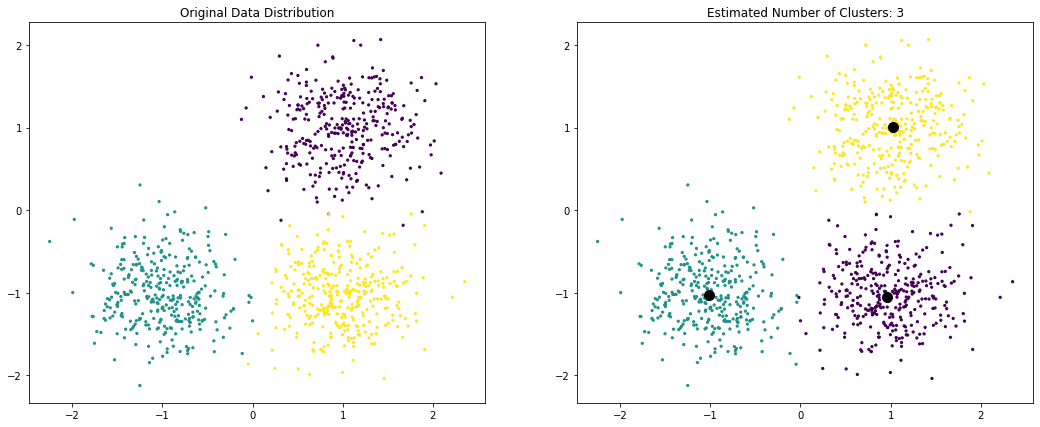

In [5]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
ax[0].scatter(X[:,0],X[:,1],s=5,c=y)
ax[0].set_title("Original Data Distribution")
ax[1].scatter(X[:,0],X[:,1],s=5,c=labels)
ax[1].plot(cluster_centers[:,0], cluster_centers[:,1], 'o', markersize=10, color='Black')
ax[1].set_title("Estimated Number of Clusters: {}".format(n_clusters))
plt.show()

#### <i>Image Segmentation Using Mean-Shift

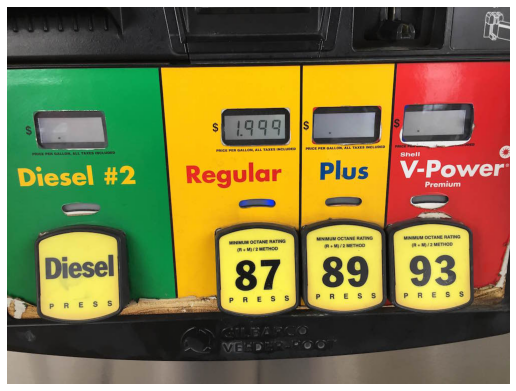

In [6]:
from PIL import Image

path = "C:\\Users\\vedas\\Desktop\\sample.jpg"
img = Image.open(path)

plt.figure(figsize=(9,7))
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
img.size

(1000, 750)

In [9]:
flatten_img = np.reshape(img, [-1,3])
flatten_img.shape

(750000, 3)

In [12]:
est_bandwidth = estimate_bandwidth(flatten_img, quantile=0.2, n_samples=5000)
est_bandwidth

77.05535305706182

In [13]:
mean_shift = MeanShift(bandwidth=est_bandwidth, bin_seeding=True)
mean_shift.fit(flatten_img)
labels = mean_shift.labels_
print("Estimated Number of Clusters:{}".format(len(np.unique(labels))))

Estimated Number of Clusters:4


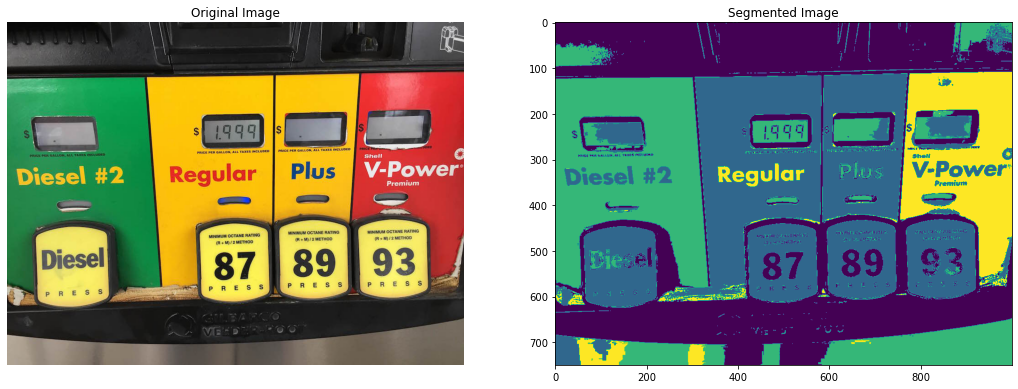

In [15]:
fig, ax = plt.subplots(1,2, figsize=(18,12))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(np.reshape(labels, img.size[::-1]))
ax[1].set_title("Segmented Image")
plt.show()

#### <i> Mean-Shift Tracking

In [16]:
# Converting the Images Dataset to Video File
import os
import cv2
from os.path import isfile, join

In [17]:
def convert_frames_to_video(pathIn, pathOut, fps):
    frame_array = []
    sorted_files = sorted(os.listdir(pathIn))
    files = [f for f in sorted_files if isfile(join(pathIn, f))]
    print(len(files))
    
    for i in range(len(files)):
        filename = join(pathIn, files[i])
        print(filename)
        img = cv2.imread(filename)
        height, width, channels = img.shape
        size = (width, height)
        frame_array.append(img)
        
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()

In [18]:
pathIn = "C:\\Users\\vedas\\Desktop\\Ball_Dataset\\Ball_Dataset"
pathOut = "video_ball.avi"
fps = 25
convert_frames_to_video(pathIn, pathOut, fps)

581
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000001.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000002.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000003.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000004.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000005.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000006.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000007.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000008.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000009.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000010.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000011.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000012.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000013.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000014.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000015.jpg
C:\Users\vedas\Desktop\Ball_Dataset\Ball_Dataset\00000016.jpg
C:\U

In [29]:
video = cv2.VideoCapture("video_ball.avi")
_, first_frame = video.read()
cv2.imshow("frame: 1", first_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
x = 200
y = 110
width = 50
height = 50

roi = first_frame[y: y+height, x: x+width]

cv2.imshow("roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi],[0],None, [360], [0,360])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TermCriteria_COUNT, 10, 1)

In [32]:
while True:
    _, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([hsv], [0], roi_hist, [0,360], 1)
    
    _, track_window = cv2.meanShift(mask, (x,y,width,height), term_criteria)
    x,y,w,h = track_window
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    
    cv2.imshow("Mask", mask)
    cv2.imshow("Frame", frame)
    
    key = cv2.waitKey(30)
    if key == 27:
        break
video.release()
cv2.destroyAllWindows()